In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


 os.path.join("/A/B/C", "file.py")) -->  /A/B/C/file.py

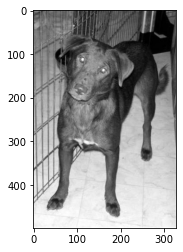

In [55]:
DATADIR = r"C:\Users\admin\Desktop\python\cat_and_dog_ds"
CATEGORIES = ['dogs','cats']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):     # dogs folderдин ичиндегилердин листин 줌
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE )
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break

In [56]:
print(img_array)
print('\n len(img_array[0]) = ',len(img_array[0]))
print('\n img_array.shape = ',img_array.shape) 
print('if doesnt get converted grayscale == color:  img_array.shape =  (499, 327, 3)')

#img properties: Dimentions: 327x499 -->  height = 499pix, width = 327pixels

[[227 156 121 ... 109 104 103]
 [237 158 113 ...  91  87  86]
 [233 152 107 ...  61  59  60]
 ...
 [255 253 249 ... 238 237 237]
 [255 254 251 ... 244 243 243]
 [255 255 253 ... 249 247 248]]

 len(img_array[0]) =  327

 img_array.shape =  (499, 327)
if doesnt get converted grayscale == color:  img_array.shape =  (499, 327, 3)


In [13]:
img_array[0] # [[      ],]


array([227, 156, 121, 132, 137, 142, 144, 130, 144, 145, 145, 142, 138,
       131, 125, 121, 117, 134, 113, 101,  95,  82,  88,  87,  87,  98,
        90, 108, 119, 100,  97,  96, 101, 126, 127,  93, 116, 115, 125,
       130, 130, 138, 140, 132, 128, 130, 130, 126, 114, 131, 126, 113,
       116, 122, 120, 122, 120, 120, 120, 122, 123, 121, 117, 113, 111,
       131, 127, 109, 108, 112, 112, 115, 120, 111, 113, 108, 101, 124,
       133, 104,  95, 101, 111, 119, 119, 117, 119, 124, 112, 102, 128,
       158, 121, 103, 119,  83,  79,  85,  73,  69,  62,  76,  73, 130,
       130,  83,  67,  72,  63,  68,  86,  87,  65,  91, 125,  97,  70,
        85,  81,  71, 113,  76,  76, 134, 131,  72,  53,  49,  58,  68,
        53,  82, 122, 107,  82,  66,  65,  77,  77,  84, 110, 123, 111,
       101,  99,  69,  69, 133,  98,  55,  51,  65,  76, 104,  97,  84,
        77,  87, 110, 100,  83,  86, 100, 102,  91,  91,  98,  94,  89,
        95,  86,  94,  89,  82, 107, 120,  98,  76,  76,  90,  8

In [33]:
# make all images same size

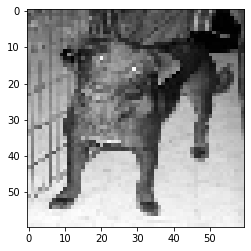

In [47]:
IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

# Training ds

In [73]:
IMG_SIZE = 60

training_data = []

def create_training_data():
    for category in CATEGORIES:
            path = os.path.join(DATADIR, category)
            class_num = CATEGORIES.index(category) # 0 if 'dogs', 'cat' 1
            
            for img in os.listdir(path):
                try:             
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    img_array = cv2.resize(img_array,( IMG_SIZE, IMG_SIZE))
                    training_data.append([img_array, class_num])
                    
                except Exception as e:
                    pass

                
create_training_data()         
len(training_data)

8000

In [76]:
CATEGORIES.index('dogs')

0

In [77]:
training_data

[[array([[111, 122,  81, ...,  95,  66,  65],
         [ 65, 109,  92, ..., 103,  80,  72],
         [ 85,  89, 107, ...,  84,  83,  69],
         ...,
         [247, 248, 250, ..., 236, 234, 227],
         [247, 246, 244, ..., 236, 225, 228],
         [242, 237, 243, ..., 240, 237, 232]], dtype=uint8),
  0],
 [array([[114,  99,  99, ..., 122, 122, 121],
         [ 79, 102, 123, ..., 123, 121, 123],
         [129, 119, 130, ..., 123, 122, 119],
         ...,
         [203, 202, 199, ...,  96,  95,  97],
         [204, 196, 194, ...,  93,  97,  97],
         [201, 197, 202, ...,  93,  92,  93]], dtype=uint8),
  0],
 [array([[187, 184, 180, ...,  33,  34,  37],
         [183, 181, 185, ...,  42,  36,  41],
         [184, 180, 184, ...,  80,  47,  25],
         ...,
         [171, 172, 174, ...,  72,  62,  68],
         [151, 157, 173, ...,  58,  61,  70],
         [167, 155, 149, ...,  62,  60,  66]], dtype=uint8),
  0],
 [array([[ 14,   7,   7, ..., 149, 134, 165],
         [ 32,  46,  

In [79]:
len(training_data)

8000

In [90]:
import random 
random.shuffle(training_data)

In [92]:
for sample in training_data[:5]:
    print(sample)

[array([[ 67,  62,  63, ...,  57,  54,  53],
       [ 65,  71,  67, ...,  54,  54,  55],
       [ 67,  65,  68, ...,  53,  53,  54],
       ...,
       [125, 120, 125, ...,  57,  58, 101],
       [120, 123, 118, ...,  54, 102, 131],
       [112, 120, 123, ..., 106, 117, 114]], dtype=uint8), 0]
[array([[240, 242, 244, ...,  56,  55,  52],
       [224, 242, 210, ...,  30,  28,  28],
       [241, 243, 242, ...,  28,  24,  24],
       ...,
       [176, 175, 168, ...,  23,  21,  13],
       [162, 157, 151, ...,  21,  18,   9],
       [143, 141, 138, ...,  24,  29,  19]], dtype=uint8), 1]
[array([[109, 107, 105, ..., 122, 126, 118],
       [ 73,  78,  89, ...,  94,  96,  82],
       [ 64,  69,  75, ...,  86, 106, 107],
       ...,
       [ 63,  63,  64, ..., 123, 128, 115],
       [ 56,  56,  67, ..., 119, 119,  99],
       [ 60,  61,  72, ..., 127, 119, 125]], dtype=uint8), 1]
[array([[ 92,  93,  97, ...,  85,  59,  52],
       [133, 139, 140, ...,  29,  45,  53],
       [203, 209, 212, ...

In [142]:
X = []
y = []

In [143]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [144]:
X

[array([[ 67,  62,  63, ...,  57,  54,  53],
        [ 65,  71,  67, ...,  54,  54,  55],
        [ 67,  65,  68, ...,  53,  53,  54],
        ...,
        [125, 120, 125, ...,  57,  58, 101],
        [120, 123, 118, ...,  54, 102, 131],
        [112, 120, 123, ..., 106, 117, 114]], dtype=uint8),
 array([[240, 242, 244, ...,  56,  55,  52],
        [224, 242, 210, ...,  30,  28,  28],
        [241, 243, 242, ...,  28,  24,  24],
        ...,
        [176, 175, 168, ...,  23,  21,  13],
        [162, 157, 151, ...,  21,  18,   9],
        [143, 141, 138, ...,  24,  29,  19]], dtype=uint8),
 array([[109, 107, 105, ..., 122, 126, 118],
        [ 73,  78,  89, ...,  94,  96,  82],
        [ 64,  69,  75, ...,  86, 106, 107],
        ...,
        [ 63,  63,  64, ..., 123, 128, 115],
        [ 56,  56,  67, ..., 119, 119,  99],
        [ 60,  61,  72, ..., 127, 119, 125]], dtype=uint8),
 array([[ 92,  93,  97, ...,  85,  59,  52],
        [133, 139, 140, ...,  29,  45,  53],
        [203, 20

In [145]:
X = np.array(X) #(8000, 60, 60)
X.shape

(8000, 60, 60)

In [146]:
#       batch_size,  hight,   width,    channel (1 = grayscale, 3 = color img)
X = X.reshape(-1,   IMG_SIZE,  IMG_SIZE,  1  )

In [147]:
X.shape

(8000, 60, 60, 1)

In [148]:
X

array([[[[ 67],
         [ 62],
         [ 63],
         ...,
         [ 57],
         [ 54],
         [ 53]],

        [[ 65],
         [ 71],
         [ 67],
         ...,
         [ 54],
         [ 54],
         [ 55]],

        [[ 67],
         [ 65],
         [ 68],
         ...,
         [ 53],
         [ 53],
         [ 54]],

        ...,

        [[125],
         [120],
         [125],
         ...,
         [ 57],
         [ 58],
         [101]],

        [[120],
         [123],
         [118],
         ...,
         [ 54],
         [102],
         [131]],

        [[112],
         [120],
         [123],
         ...,
         [106],
         [117],
         [114]]],


       [[[240],
         [242],
         [244],
         ...,
         [ 56],
         [ 55],
         [ 52]],

        [[224],
         [242],
         [210],
         ...,
         [ 30],
         [ 28],
         [ 28]],

        [[241],
         [243],
         [242],
         ...,
         [ 28],
         [

# Training our data
along the way сурот форматты биз data analysingге колдоно ала турган форматка келтирдик --> array--> reshpe-->..      
кечке бул датаны колдонгодо кайра кайра сурот форматты дата форматка которо бербей дата форматты pkl форматтагы файлга сохр кылып койсо кийин каггл дан сsv файлды алып сразу кыла бергендей колдоно беребиз

In [138]:

import pickle 

pickle_out = open("X.pickle","wb")  
pickle.dump(X, pickle_out)
pickle_out.close()

# ----SAME---
# with open("X.pickle","wb") as pickle_out:
#     pickle.dump(X, pickle_out)

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [139]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [149]:
X[0] # 첫사진

array([[[ 67],
        [ 62],
        [ 63],
        ...,
        [ 57],
        [ 54],
        [ 53]],

       [[ 65],
        [ 71],
        [ 67],
        ...,
        [ 54],
        [ 54],
        [ 55]],

       [[ 67],
        [ 65],
        [ 68],
        ...,
        [ 53],
        [ 53],
        [ 54]],

       ...,

       [[125],
        [120],
        [125],
        ...,
        [ 57],
        [ 58],
        [101]],

       [[120],
        [123],
        [118],
        ...,
        [ 54],
        [102],
        [131]],

       [[112],
        [120],
        [123],
        ...,
        [106],
        [117],
        [114]]], dtype=uint8)